<a href="https://colab.research.google.com/github/SiddheshDaphane/Deep_Learning_With_PyTorch/blob/master/02_PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is clasification problem?

A classifiction problem invovles predicting whether something is one thing or another.



## 0. Architecture of a classifiction neural network

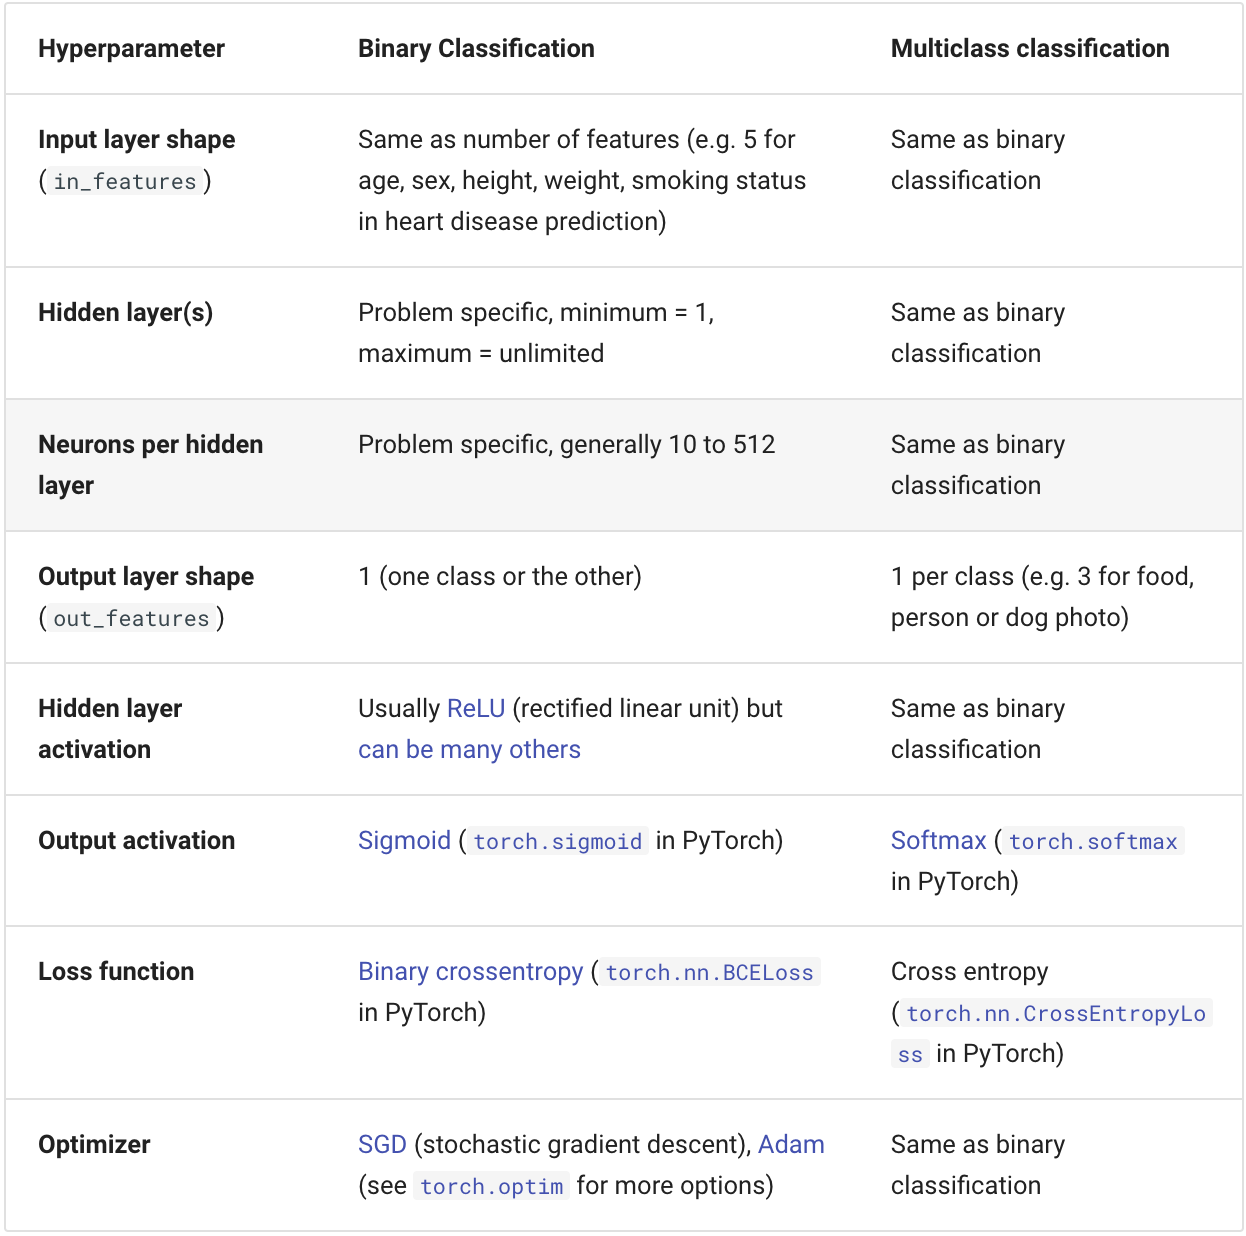

## 1. Make classifictaion data and get it ready.

In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles

X , y = make_circles(n_samples,
                     noise=0.03,
                     random_state = 42)

In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [4]:
X, X.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 (1000, 2))

In [5]:
X[:,0]

array([ 7.54246251e-01, -7.56158882e-01, -8.15391934e-01, -3.93730729e-01,
        4.42207645e-01, -4.79646368e-01, -1.36483595e-02,  7.71513274e-01,
       -1.69322340e-01, -1.21485796e-01, -6.42490416e-01,  5.69466604e-01,
       -1.17735911e-01,  7.34100038e-01,  6.00776333e-01,  1.90225707e-01,
       -9.36951846e-01,  1.07061696e-01, -8.18913619e-01, -6.42100130e-01,
        6.26827199e-01, -5.62291360e-01, -2.12666579e-02,  7.39770578e-01,
       -9.09048393e-01, -9.36994111e-01,  2.86615780e-01,  8.26260717e-01,
        2.53433397e-01,  6.57946255e-01, -3.14834779e-01, -2.23989601e-01,
        8.44389246e-03,  1.00503887e+00, -8.95158198e-02, -7.88574473e-01,
       -5.68205362e-01,  4.47646782e-01,  2.63260719e-01,  7.45020435e-01,
       -5.97118971e-01,  3.61928379e-01, -7.14242507e-01,  8.33839377e-01,
       -8.33981856e-01, -9.10860642e-01,  4.87625557e-01,  2.30736878e-01,
        7.58412791e-01, -4.12746839e-01,  4.76176622e-01,  3.99958509e-02,
       -9.66328252e-01,  

In [6]:
import pandas as pd

circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


It looks like each pair of `X` features (`X1` and `X2`) has a label (`y`) value of either 0 or 1. This tells us that our problem is **binary classification** since there's only two options (0 or 1)

In [7]:
# Check different labels meaning how many values of 0 and 1

circles['label'].value_counts()

,count
label,
1,500
0,500


Our distribution of data is 50% which means we don't have to adjust our data. If it was 70-30 then our model may become bias towards one value and it will not be accurate.

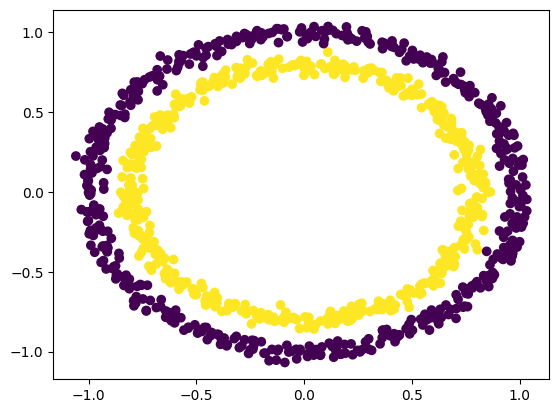

In [8]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y)

## 1.1 Input and output shapes
****
One of the most common errors in deep learning is shape errors.

Mismatching the shapes of tensors and tensor operations will result in errors in your model.

And there's no surefire way to make sure they won'y happene, they will

What you can do instead us continually familiarize yourself with the shape of the data you're working with.

Ask yourself:

**"What shapes are my input and what shapes are my outputs?**

In [9]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

First dimension of each is matched but not second.

In [10]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and same for y: {y_sample}\n")
print(f"Shapes for one smaple of X: {X_sample.shape} and same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and same for y: 1

Shapes for one smaple of X: (2,) and same for y: ()


**We have two inputs for one output**

## 1.2 Turn data into tensors and create train and test splits

Right data is in NumPy array.

In [11]:
X.dtype

dtype('float64')

In [12]:
# Turn data into tensor otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float) # need to change the data type because default data type of NumPy array is 'float64' and PyTorch uses 'float32' so if we directly convert then it will be 'float64'
y = torch.from_numpy(y).type(torch.float)

# View the first five smaples
X[:5], y[:5]



(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
# Split data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model
****
Let's break down into few parts

1. Setting up device agnostic code (so model can run on CPU or GPU if it's available).

2. Constructing a model by subclassing `nn.Module`.

3. Define a loss function and optimizer.

4. Creating a training loop

In [14]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

We'll want a model capable of handling our `X` data as inputs and producing comething in the shape of our `y` data as output.

In other words, give `X` (deatures) we want our model to predict `y` (label).

This setup where you have features and labels is referred to as **supervised learning** because your data is telling your model what the output should be given a certain input.

To create such a model it'll need to handle the input and output shapes of `X` and `y`.

Let's create a model class that:

1. Subclass `nn.module`

2. Cretes 2 `nn.Linear` layers in the constructor capable of handling the input and output shapes of `X` and `y`.

3. Defines a `forward()` method containing the forward pass computation of the model

4. Instantiates the model class and sends it to the target `device`.

In [15]:
# 1. Construct a model class that subclasses nn.Module
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produce 1 feature (y)

  # 3. Define a forward method.
  def forward(self,x):
    # Return the output of layer_2, a single feature, the same shape as y
    return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Instance the model and send it to target device.
model_0 = CircleModel().to(device)
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

What's going on here?

We've seen a few of these steps before.

The only major change is what's happening between `self.layer_1` and `self.layer_2`.

`self.layer_1` takes 2 input features `in_features=2` and produces 5 output features `out_features=5`.

This is known as having 5 **hidden units or neurons**.

This layer turns the input data from having 2 features to 5 features.

Why do this?

This allows the model to learn patterns from 5 numbers rather than just 2 numbers, potentially leading to better outputs.

I say potentially because sometimes it doesn't work.

The number of hidden units you can use in neural network layers is a **hyperparameter** (a value you can set yourself) and there's no set in stone value you have to use.

The only rule with hidden units is that the next layer, in our case, `self.layer_2` has to take the same `in_features` as the previous layer `out_features`.

That's why `self.layer_2` has `in_features=5`, it takes the `out_features=5` from `self.layer_1` and performs a linear computation on them, turning them into `out_features=1` (the same shape as y).

**We can create same model using `nn.Sequential`**

`nn.Sequential` performs a forward pass computatio of the input data through the layers in the order they appear

In [16]:
# Replicate circleModel with nn.Sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

`nn.Sequential` is fantastic for straight-forward computations, however, as the namespce says, it always runs in sequential order.

So if you'd like something else to happen (rather than just straight-forward sequential computation) you'll want to define your own custom `nn.Module` subclass.

In [17]:
# Make predictions with the model

untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test sample: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test sample: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[0.3028],
        [0.3867],
        [0.3113],
        [0.2995],
        [0.6737],
        [0.7220],
        [0.6709],
        [0.7504],
        [0.2960],
        [0.3963]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


Predictions don't look like they're in the same form or shape as the test labels.

## 2.1 Setup loss function and optimizer

Different problem types require different loss functions.

For e.g., for a regression problem (predicting a number) you might use mean absolute error (MAE) loss.

And for a binary classification problem, you'll oftern use ***binary cross entropy*** as the loss function.

However, the same optimizer function can often be used across different problem spaces.

For example, the stochastic gradient descent optimizer (SGD, `torch.optim.SGD()`) can be used for a range of problems, and the same applies to the Adam optimizer (`torch.optim.Adam()`).

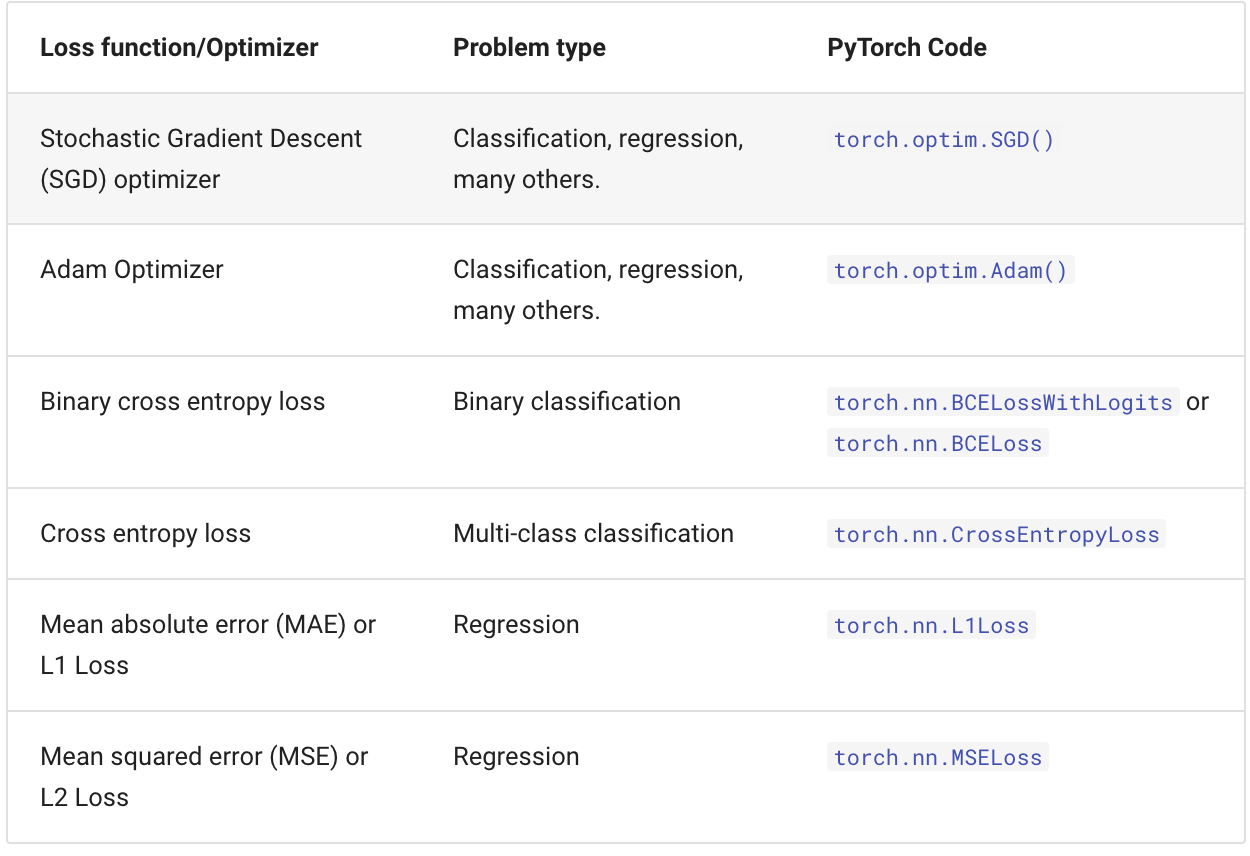

PyTorch has two binary cross entropy implementations:

1. `torch.nn.BCELoss()` - Creates a loss function that meansures the binary cross entropy between the target (label) and input (features).

2. `torch.nn.BCEWithLogitsLoss()` - This the same as above except it has sigmoid layer (`nn.Sigmoid`) built-in.

*Which one should you use?*

The documentation for `torch.nn.BCEWithLogitsLoss()` states that it's more numerically stable than using `torch.nn.BCELoss()` after a `nn.Sigmoid` layer.

In [18]:
# Create a loss function
# loss_fn = nn.BCELoss()  # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

Now let's also create an **evaluation metric**

If a loss function measures how wrong your model is, I like to think of evaluation metrics as measuring how right it is. Evaluation metrics offer a differnt perspective.

Let's write a function to measure **accuracy**.

In [19]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq calculates where two tensors are equal and returns True or False and that's why we used .sum()
  acc = (correct / len(y_pred)) * 100
  return acc

# PyTorch operations return tensors, even if they contain a single value. Using `.item()` converts this single-value tensor into a Python scalar, which is more compatible with standard Python functions.

## 3. Train Model

### 3.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

Before the training loop steps, let's see what comes out of our model during the forward pass

In [20]:
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.3028],
        [0.3867],
        [0.3113],
        [0.2995],
        [0.6737]], grad_fn=<SliceBackward0>)

Since our model hasn't been trained, these outputs are basically random.

The *raw ouputs* (unmodified) of the `nn.Linear()` equation are often referred to as **logits**

That's what our model is outputing above when it takes in the input data. logits.

However, these numbers are hard to interpret.

To get our model's raw outputs (logits) into such a form, we can use the `sigmoid Activation Function`

In [21]:
# Use sigmoid on model logits to get prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5751],
        [0.5955],
        [0.5772],
        [0.5743],
        [0.6623]], grad_fn=<SigmoidBackward0>)

It seems like the outputs now have some kind of consistency (even though they're still random.)

They're now in the form of **prediction probabilities**, in other words, the values are now hoe much the model thinks the data point belogs to one class or another.

In this case, since we're dealing with binary classification, our ideal outouts are 0 or 1.

So these values can be viewed as a decision boundary.

The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

More specifically

* If `y_pred_probs` >= 0.5, `y=1` (class 1)

* If `y_pred_prbs` < 0.5, `y=0` (Class 0)

To turn our prediction probabilities into prediction labels, we can round the outputs of the sigmoid activation function.

In [22]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.], grad_fn=<SqueezeBackward0>)

Now it looks like our model's predictions are in the same form as our truth labels `y_test`.

This means we'll be able to comapre our model's predictions to the test labels to see how well it's performing.

To recap, we converted our row outputs (logits) to prediction probabilities using a sigmoid activation function and then converted the prediction probabilities to prediction labels by rounding them.

## 3.2 Building a training and testing loop

In [23]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Trianing
  model_0.train()

  # 1. Forward pass (model outputs raw logits)
  y_logits = model_0(X_train).squeeze() # squeeze to remove extra '1' dimensions
  y_pred = torch.round(torch.sigmoid(y_logits)) # turns logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy

  #loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
   #              y_train)

  loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred = test_pred)

  # print out what's happening every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Training Loss: {loss:.5f}, Training Accuracy: {acc:.2f} | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}")



Epoch: 0 | Training Loss: 0.72643, Training Accuracy: 50.00 | Test Loss: 0.72384, Test acc: 50.00
Epoch: 10 | Training Loss: 0.71014, Training Accuracy: 50.00 | Test Loss: 0.70807, Test acc: 50.00
Epoch: 20 | Training Loss: 0.70282, Training Accuracy: 58.75 | Test Loss: 0.70099, Test acc: 57.50
Epoch: 30 | Training Loss: 0.69934, Training Accuracy: 53.00 | Test Loss: 0.69769, Test acc: 55.00
Epoch: 40 | Training Loss: 0.69757, Training Accuracy: 51.12 | Test Loss: 0.69608, Test acc: 55.50
Epoch: 50 | Training Loss: 0.69657, Training Accuracy: 50.75 | Test Loss: 0.69526, Test acc: 53.50
Epoch: 60 | Training Loss: 0.69595, Training Accuracy: 50.12 | Test Loss: 0.69482, Test acc: 54.50
Epoch: 70 | Training Loss: 0.69552, Training Accuracy: 49.62 | Test Loss: 0.69457, Test acc: 54.00
Epoch: 80 | Training Loss: 0.69519, Training Accuracy: 49.50 | Test Loss: 0.69442, Test acc: 54.00
Epoch: 90 | Training Loss: 0.69493, Training Accuracy: 50.00 | Test Loss: 0.69433, Test acc: 53.50


It looks like model went through the training and testing steps fine but the result don't seem to have moved too much.

The accuracy barely moves above 50% on each data split.

And beacuse we're working with a balanced binary classification problem, it means our model is performing as good as random guessing (with 500 samples of class 0 and class 1 a model predicting class 1 every single time would achieve 50% accuracy.)

## 4 Make predictions and evaluate the model
****
Let's make a plot of our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 or class 1.

To do so, we'll write some code to download and import the `helper_functions.py` script from github repo

It contains a helpful function called `plot_decision_boundary()` which creates a NumPy meshgrid to visually plot the different points where our model is predicting certain classes.

In [24]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_function.py").is_file():
  print("helper_function.py already exists, skipping download")
else:
  print("Downloading helper_fucntion.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

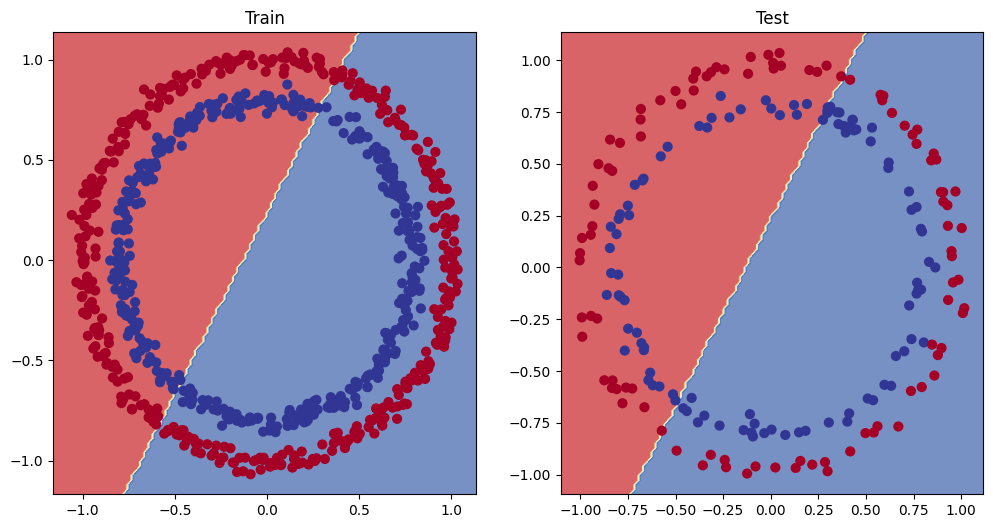

In [25]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # 1 row, 2 column, 1st index
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

It seems like we've found the cause of model's performace issues.

It's currently trying to split the red and blue dots using a straight line

That explains 50% accuracy. Since our data is circular, drawing a staright line can at best cut it down the middle.

In machine learning terms, our model is **underfitting**, meaning it's not learning predictive patterns from the data.

## 5. Impoving a model (from a model prespective)

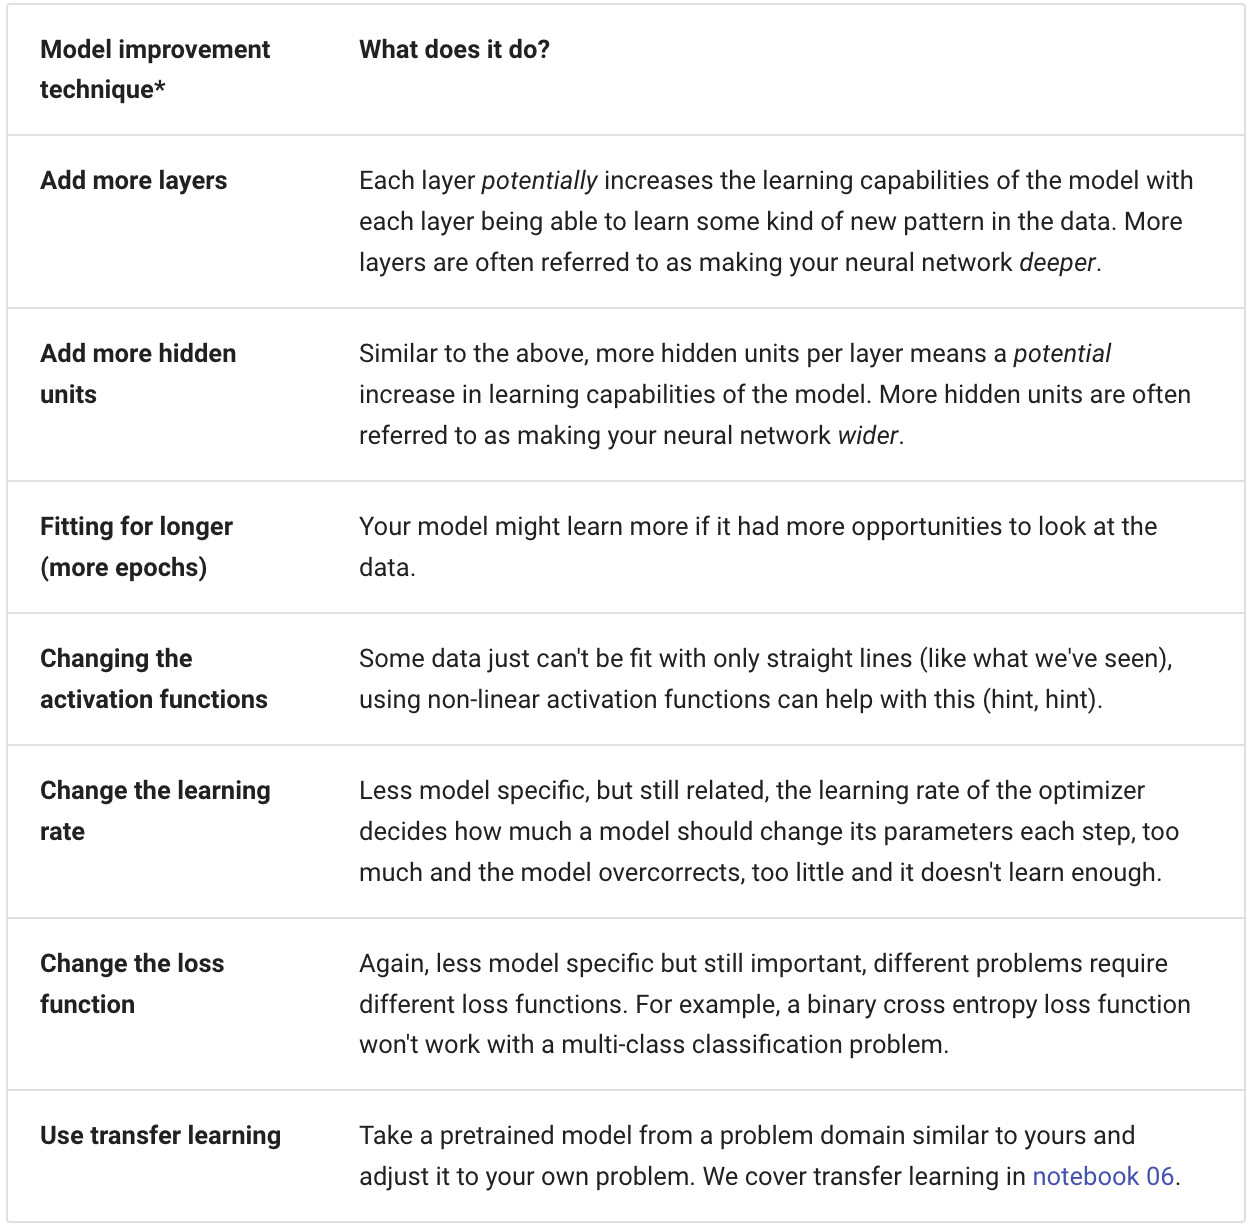

Let's see what happens if we add an extra layer to our model, fir for longer (`epochs = 1000` instead of `epochs = 100`) andn increase the number of hidden units from 5 to   `10`.

In [26]:
class CircleModel1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # Creating a model like this is the same as below, though below
    # generally benefits from speedups where possible.
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModel1().to(device)
model_1

CircleModel1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [27]:
# loss funtion and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [28]:
torch.manual_seed(42)

epochs = 1000 # train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forwards pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred= y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwords
  loss.backward()

  # 5. Optimizer
  optimizer.step()

  ### Testing
  model_1.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calcualte loss
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred = test_pred)

  # Print out the values
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Training Loss: {loss:.5f}, Training Accuracy: {acc:.2f} | Testing loss: {test_loss:.5f}, Testing Accuracy: {test_acc:.2f}")

Epoch: 0 | Training Loss: 0.69396, Training Accuracy: 50.88 | Testing loss: 0.69261, Testing Accuracy: 51.00
Epoch: 100 | Training Loss: 0.69305, Training Accuracy: 50.38 | Testing loss: 0.69379, Testing Accuracy: 48.00
Epoch: 200 | Training Loss: 0.69299, Training Accuracy: 51.12 | Testing loss: 0.69437, Testing Accuracy: 46.00
Epoch: 300 | Training Loss: 0.69298, Training Accuracy: 51.62 | Testing loss: 0.69458, Testing Accuracy: 45.00
Epoch: 400 | Training Loss: 0.69298, Training Accuracy: 51.12 | Testing loss: 0.69465, Testing Accuracy: 46.00
Epoch: 500 | Training Loss: 0.69298, Training Accuracy: 51.00 | Testing loss: 0.69467, Testing Accuracy: 46.00
Epoch: 600 | Training Loss: 0.69298, Training Accuracy: 51.00 | Testing loss: 0.69468, Testing Accuracy: 46.00
Epoch: 700 | Training Loss: 0.69298, Training Accuracy: 51.00 | Testing loss: 0.69468, Testing Accuracy: 46.00
Epoch: 800 | Training Loss: 0.69298, Training Accuracy: 51.00 | Testing loss: 0.69468, Testing Accuracy: 46.00
Epo

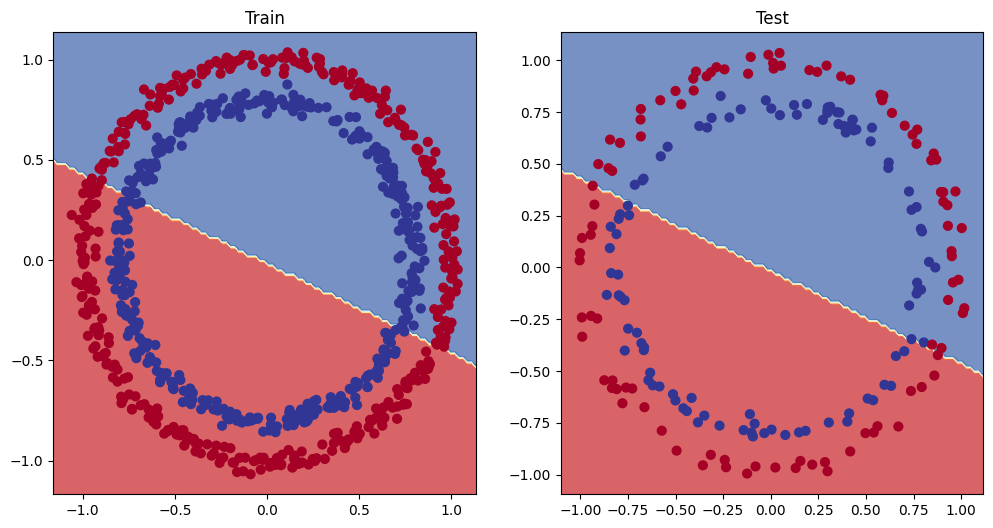

In [29]:
# Let's visualize

# Plot decision boundaries for traning and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

## 5.1 Preparing data to see if our model can model a straight line
****
Let's create some linear data to see if our model's able to model it and we're not just using a model that can't learn anything.

In [30]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [31]:
# Create train and test split
train_split = int(0.8 * len(X_regression)) # 80% of our data used for training
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
      len(y_train_regression),
      len(X_test_regression),
      len(y_test_regression))

80 80 20 20


In [32]:
X_train_regression.shape, y_train_regression.shape

(torch.Size([80, 1]), torch.Size([80, 1]))

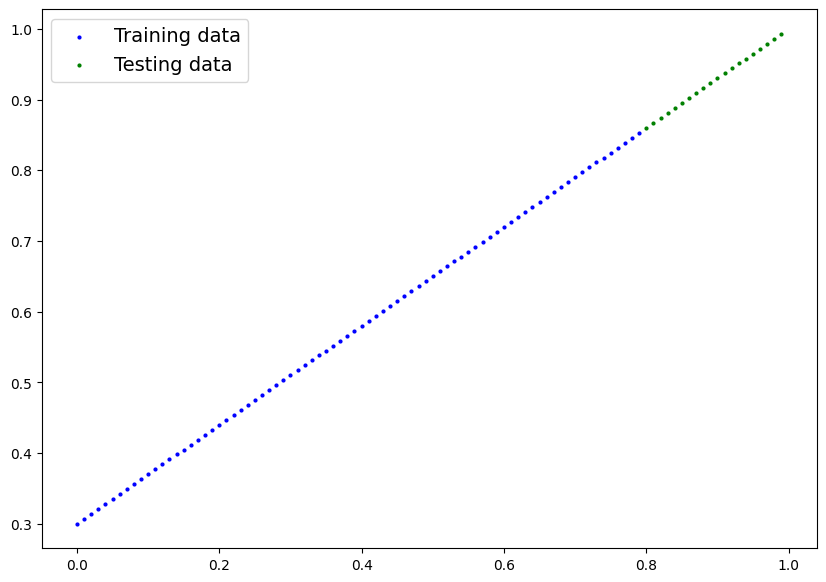

In [33]:
# lets plot the graph
plot_predictions(train_data= X_train_regression,
                 train_labels= y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

## 5.2 Adjusting `model_1` to fit a straight line

In [34]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [35]:
# Loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [36]:
# Train the model
torch.manual_seed(42)

# set the number of epochs
epochs = 1000

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_2.train()

  # 1. Forward pass
  y_pred = model_2(X_train_regression)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train_regression)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_2.eval()

  with torch.inference_mode():
    # 1. forward pass
    test_pred = model_2(X_test_regression)

    # 2. Calculate loss
    test_loss = loss_fn(test_pred, y_test_regression)

  # print out what's happening
  if epoch % 100 ==0:
    print(f"Epoch: {epoch} | Training Loss: {loss:.5f} | Testing Loss: {test_loss:.5f}")

Epoch: 0 | Training Loss: 0.75986 | Testing Loss: 0.54143
Epoch: 100 | Training Loss: 0.09309 | Testing Loss: 0.02901
Epoch: 200 | Training Loss: 0.07376 | Testing Loss: 0.02850
Epoch: 300 | Training Loss: 0.06745 | Testing Loss: 0.00615
Epoch: 400 | Training Loss: 0.06107 | Testing Loss: 0.02004
Epoch: 500 | Training Loss: 0.05698 | Testing Loss: 0.01061
Epoch: 600 | Training Loss: 0.04857 | Testing Loss: 0.01326
Epoch: 700 | Training Loss: 0.06109 | Testing Loss: 0.02127
Epoch: 800 | Training Loss: 0.05600 | Testing Loss: 0.01425
Epoch: 900 | Training Loss: 0.05571 | Testing Loss: 0.00603


In [70]:
# Trun on the eval mode
model_2.eval()

# Predict using inference mode
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

y_pred.shape

torch.Size([20, 1])

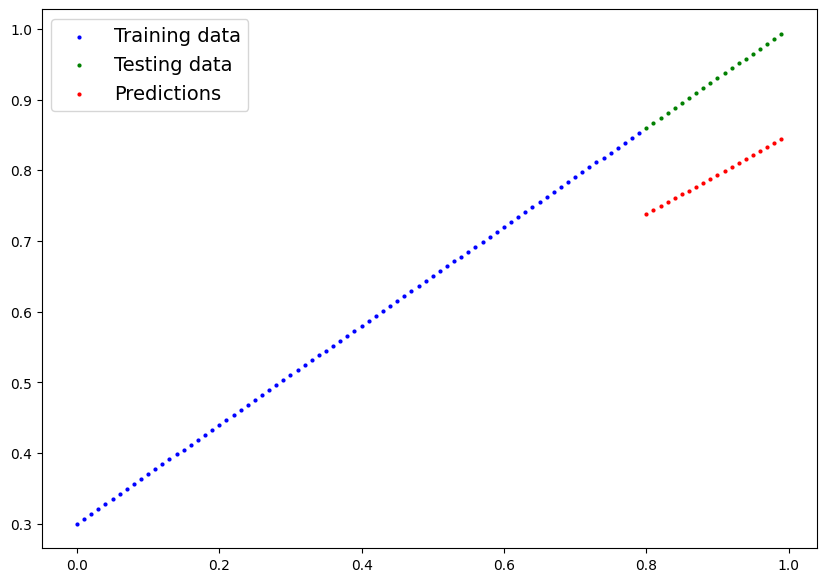

In [71]:
# plot
plot_predictions(train_data= X_train_regression,
                 train_labels= y_train_regression,
                 test_data=X_test_regression,
                 test_labels= y_test_regression,
                 predictions = y_preds)

In [40]:
X_train_regression.shape, y_train_regression.shape

(torch.Size([80, 1]), torch.Size([80, 1]))

In [42]:
X_test_regression.shape, y_test_regression.shape

(torch.Size([20, 1]), torch.Size([20, 1]))

In [44]:
y_pred.shape

torch.Size([20, 1])

In [57]:
X_train_regression.size() == y_train_regression.size()

True

In [56]:
X_test_regression.size() == y_test_regression.size()

True

In [59]:
y_pred.size() == y_test_regression.size()

True

In [69]:
print("Shapes of inputs:")
print(f"train_data: {X_train_regression.detach().numpy().shape}")
print(f"train_labels: {y_train_regression.detach().numpy().shape}")
print(f"test_data: {X_test_regression.detach().numpy().shape}")
print(f"test_labels: {y_test_regression.detach().numpy().shape}")
if y_preds is not None:
    print(f"predictions: {y_preds.shape}")


Shapes of inputs:
train_data: (80, 1)
train_labels: (80, 1)
test_data: (20, 1)
test_labels: (20, 1)
predictions: torch.Size([5, 1])


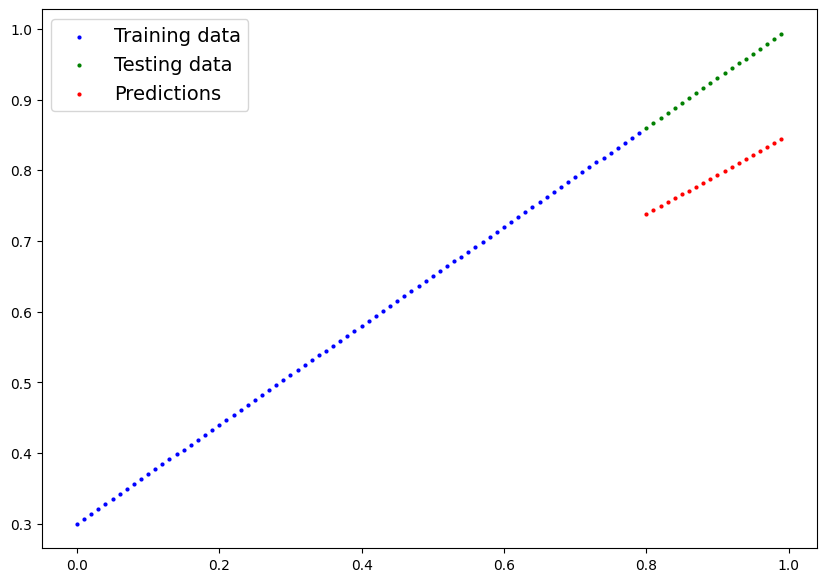

In [72]:
plot_predictions(train_data = X_train_regression.detach().numpy().squeeze(),
                 train_labels= y_train_regression.detach().numpy().squeeze(),
                 test_data= X_test_regression.detach().numpy().squeeze(),
                 test_labels= y_test_regression.detach().numpy().squeeze(),
                 predictions= y_preds.detach().numpy().squeeze());

Alright, it looks like our model is able to do far better than random guessing on staright lines.

This is a good thing.

It means our model at least has some capacity to learn.

## 6. The missing piece: non-linearity
We've seen our model can draw straight (linear) lines, thanks to it's linear layers.

But how about we give it the capacity to draw non-straight (non-linear) lines?

## 6.1 Recreating non-linear data (red and blue circles)

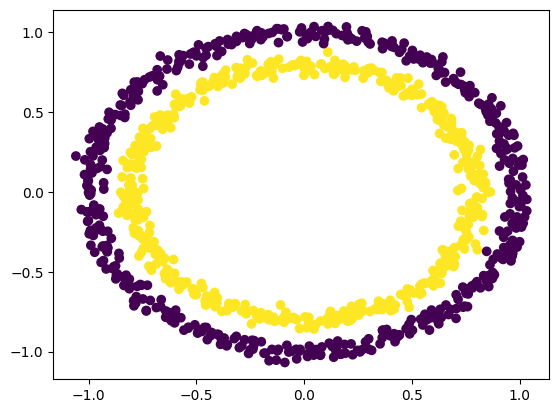

In [75]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
                    noise= 0.03,
                    random_state=42)

plt.scatter(X[:,0],X[:,1], c=y)

In [76]:
# convert to tensors and split into train and test sets

import torch
from torch import nn
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

## 6.2 Buildimg a model with non_linearity